In [13]:
%matplotlib inline
import pandas as pd

In [14]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [15]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [16]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

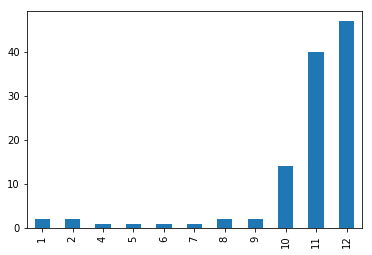

In [61]:
#Filter both df to get movies with "Christmas" in their title
#christmas_cast = cast[cast.title.str.contains('Christmas')]
filtered_release_dates = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]

#Get the release months
months = filtered_release_dates.date.dt.month

#plot the number of released movies each month
months.value_counts().sort_index().plot(kind = 'bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

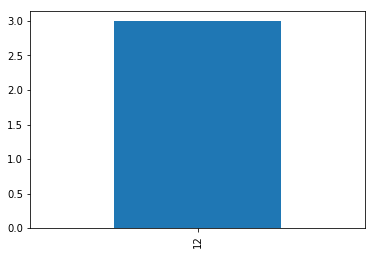

In [63]:
#Filter both df to get movies whose titles start with "The Hobbit"
#christmas_cast = cast[cast.title.str.contains('Christmas')]
filtered_release_dates = release_dates[(release_dates.title.str.startswith('The Hobbit')) & (release_dates.country == 'USA')]

#Get the release months
months = filtered_release_dates.date.dt.month

#plot the number of released movies each month
months.value_counts().sort_index().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

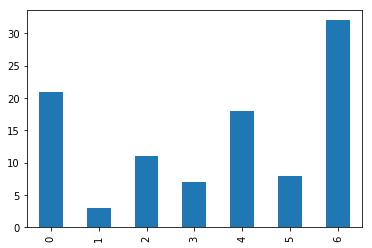

In [64]:
#Filter movies by title
filtered_release_dates = release_dates[(release_dates.title.str.contains('Romance')) & (release_dates.country == 'USA')]

#Get the release day of week
day_of_week = filtered_release_dates.date.dt.dayofweek

#plot the number of released movies each month
day_of_week.value_counts().sort_index().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

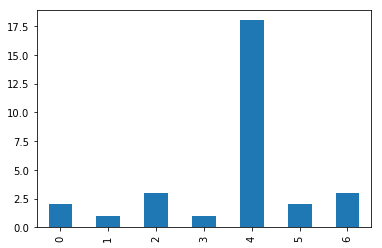

In [65]:
#Filter movies by title
filtered_release_dates = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]

#Get the release day of week
day_of_week = filtered_release_dates.date.dt.dayofweek

#plot the number of released movies each month
day_of_week.value_counts().sort_index().plot(kind = 'bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [104]:
#Filter movies by name and year
#filtered_cast = cast[(cast.name == 'Judi Dench') & (cast.year >= 1990)]
filtered_cast = cast[cast.name == 'Judi Dench']

#Filter data frame release dates by country and year
filtered_release_dates = release_dates[(release_dates.country == 'USA') & (release_dates.date.dt.year >= 1990)]

#Merge data frames to combine cast information with country and dates
m = pd.merge(filtered_cast, filtered_release_dates, on=['title', 'year'])
#m.head()
m.groupby([m.title, m.date]).size()
#m.date.value_counts().sort_index()

title                                        date      
Casino Royale                                2006-11-17    1
Chocolat                                     2001-01-19    1
Die Another Day                              2002-11-22    1
Doogal                                       2006-02-24    1
GoldenEye                                    1995-11-17    1
Hamlet                                       1996-12-25    1
Home on the Range                            2004-04-02    1
Iris                                         2002-03-29    1
J. Edgar                                     2011-11-11    1
Jack & Sarah                                 1996-03-22    1
Jane Eyre                                    2011-04-22    1
Ladies in Lavender                           2005-05-27    1
Miss Peregrine's Home for Peculiar Children  2016-09-30    1
Mrs Brown                                    1997-10-03    1
Mrs Henderson Presents                       2006-02-17    1
Murder on the Orient Express 

### In which months do films with Judi Dench tend to be released in the USA?

In [105]:
m.date.dt.month.value_counts().head()

11    11
12     4
5      4
1      4
3      3
Name: date, dtype: int64

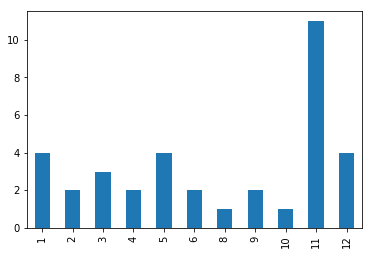

In [106]:
m.date.dt.month.value_counts().sort_index().plot(kind = 'bar')

### In which months do films with Tom Cruise tend to be released in the USA?

In [107]:
#Filter movies by name 
filtered_cast = cast[cast.name == 'Tom Cruise']

#Filter data frame release dates by country 
filtered_release_dates = release_dates[release_dates.country == 'USA']

#Merge data frames to combine cast information with country and dates
m = pd.merge(filtered_cast, filtered_release_dates, on=['title', 'year'])
m.date.dt.month.value_counts().head()

12    10
6      8
7      7
5      5
11     3
Name: date, dtype: int64

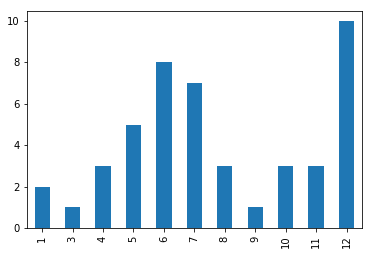

In [108]:
m.date.dt.month.value_counts().sort_index().plot(kind = 'bar')